In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def ego_graph_effective_size(G, v):
    """ Формує его-мережу вузла `v` в мережі `G` та розраховує effective size"""
    E = nx.ego_graph(G, v, center=False, undirected=True)
    effective_size = len(E) - (2 * E.size()) / len(E)
    
    fig, ax = plt.subplots(1, 1, figsize=(18,10))
    nx.draw_networkx(E, pos)
    ax.set_title(f"Его-мережа вузла #{v}, effective network size складає {effective_size:.2f}")
    plt.figtext(
        0.5, 
        0.05, 
        r"$e(u) = n - \frac{2t}{n}$, де $n$ є кількість вузлів его-мережі, $t$ є кількістю зв'язків", 
        wrap=True, 
        horizontalalignment='center', 
        fontsize=12
    )
    plt.show()

In [3]:
G = nx.krackhardt_kite_graph()
pos = nx.spring_layout(G)

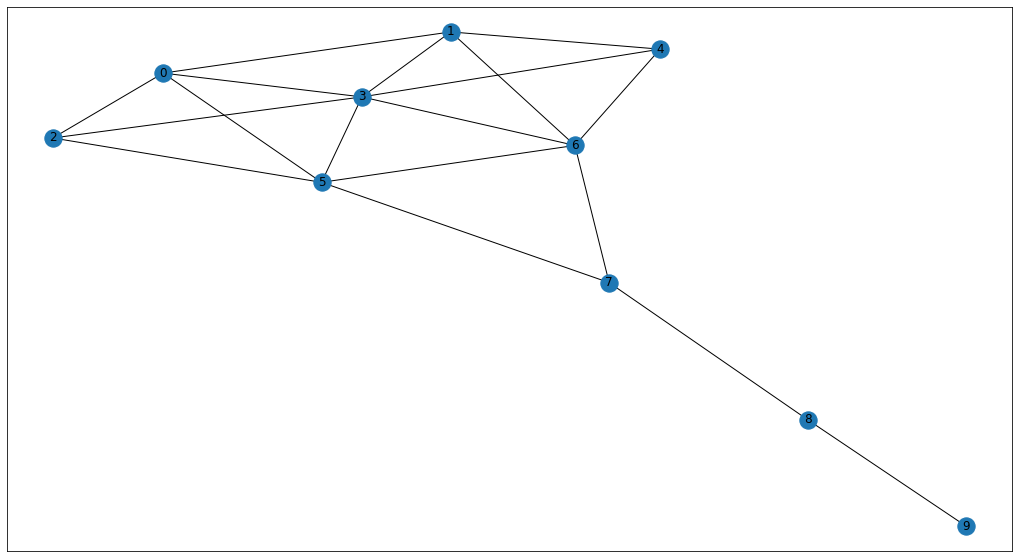

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(18,10))
nx.draw_networkx(G, pos)
plt.show()

# Скільки NODES та EDGES?

In [5]:
print(f"Кількість вузлів: {len(G.nodes())}, Перелік вузлів: {G.nodes()}")
print(f"Кількість зв'язків: {len(G.edges())}, \nПерелік зв'язків: {G.edges()}")

Кількість вузлів: 10, Перелік вузлів: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Кількість зв'язків: 18, 
Перелік зв'язків: [(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 4), (1, 6), (2, 3), (2, 5), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7), (7, 8), (8, 9)]


# Міри центральності: Centrality, Betweenness, Closeness

In [6]:
# degree_centrality
d = G.degree()
dc = nx.degree_centrality(G)
for v in G.nodes():
    print(f"Вузол{v:2}: Ступінь Центрованості {dc[v]:.2f} (кількість прямих з'язків {d[v]})")

Вузол 0: Ступінь Центрованості 0.44 (кількість прямих з'язків 4)
Вузол 1: Ступінь Центрованості 0.44 (кількість прямих з'язків 4)
Вузол 2: Ступінь Центрованості 0.33 (кількість прямих з'язків 3)
Вузол 3: Ступінь Центрованості 0.67 (кількість прямих з'язків 6)
Вузол 4: Ступінь Центрованості 0.33 (кількість прямих з'язків 3)
Вузол 5: Ступінь Центрованості 0.56 (кількість прямих з'язків 5)
Вузол 6: Ступінь Центрованості 0.56 (кількість прямих з'язків 5)
Вузол 7: Ступінь Центрованості 0.33 (кількість прямих з'язків 3)
Вузол 8: Ступінь Центрованості 0.22 (кількість прямих з'язків 2)
Вузол 9: Ступінь Центрованості 0.11 (кількість прямих з'язків 1)


In [7]:
# broker
print("Брокерство через 'Положення Між':")
b = nx.betweenness_centrality(G)
for v in G.nodes():
    print(f"Вузол{v:2}: Положення Між {b[v]:.2f}")

Брокерство через 'Положення Між':
Вузол 0: Положення Між 0.02
Вузол 1: Положення Між 0.02
Вузол 2: Положення Між 0.00
Вузол 3: Положення Між 0.10
Вузол 4: Положення Між 0.00
Вузол 5: Положення Між 0.23
Вузол 6: Положення Між 0.23
Вузол 7: Положення Між 0.39
Вузол 8: Положення Між 0.22
Вузол 9: Положення Між 0.00


In [8]:
c = nx.closeness_centrality(G)
for v in G.nodes():
    print(f"Вузол{v:2}: Наближеність {c[v]:.2}")

Вузол 0: Наближеність 0.53
Вузол 1: Наближеність 0.53
Вузол 2: Наближеність 0.5
Вузол 3: Наближеність 0.6
Вузол 4: Наближеність 0.5
Вузол 5: Наближеність 0.64
Вузол 6: Наближеність 0.64
Вузол 7: Наближеність 0.6
Вузол 8: Наближеність 0.43
Вузол 9: Наближеність 0.31


# Cliques

In [9]:
# найбільші кліки = кліки з найбільшою кількістю вузлів
[clq for clq in nx.enumerate_all_cliques(G) if len(clq) >= nx.graph_clique_number(G)]

[[0, 2, 3, 5], [1, 3, 4, 6]]

In [10]:
# розмір найбільшого кліку
nx.graph_clique_number(G)

4

In [11]:
# усі кліки
[clq for clq in nx.enumerate_all_cliques(G) if len(clq) > 1]

[[0, 1],
 [0, 2],
 [0, 3],
 [0, 5],
 [1, 3],
 [1, 4],
 [1, 6],
 [2, 3],
 [2, 5],
 [3, 4],
 [3, 5],
 [3, 6],
 [4, 6],
 [5, 6],
 [5, 7],
 [6, 7],
 [7, 8],
 [8, 9],
 [0, 1, 3],
 [0, 2, 3],
 [0, 2, 5],
 [0, 3, 5],
 [1, 3, 4],
 [1, 3, 6],
 [1, 4, 6],
 [2, 3, 5],
 [3, 4, 6],
 [3, 5, 6],
 [5, 6, 7],
 [0, 2, 3, 5],
 [1, 3, 4, 6]]

# Effective network size

In [12]:
# однією функцією
nx.effective_size(G)

{0: 2.0,
 1: 2.0,
 2: 1.0,
 3: 3.3333333333333335,
 4: 1.0,
 5: 3.0,
 6: 3.0,
 7: 2.3333333333333335,
 8: 2.0,
 9: 1.0}

In [13]:
# як це працює всередині
effective_size = {}
for v in G:
    # створюється его мережа кожного вузла
    E = nx.ego_graph(G, v, center=False, undirected=True)
    # кількість вузлів в его-мережі - (2 * кількість зв'язків) / кількість вузлів в его-мережі
    effective_size[v] = len(E) - (2 * E.size()) / len(E)

In [14]:
for k,v in effective_size.items():
    print(f"Вузол {k}, Effective network size: {v:.2f}")

Вузол 0, Effective network size: 2.00
Вузол 1, Effective network size: 2.00
Вузол 2, Effective network size: 1.00
Вузол 3, Effective network size: 3.33
Вузол 4, Effective network size: 1.00
Вузол 5, Effective network size: 3.00
Вузол 6, Effective network size: 3.00
Вузол 7, Effective network size: 2.33
Вузол 8, Effective network size: 2.00
Вузол 9, Effective network size: 1.00


# Приклад розрахунку `effective size` для *NODE* `n`

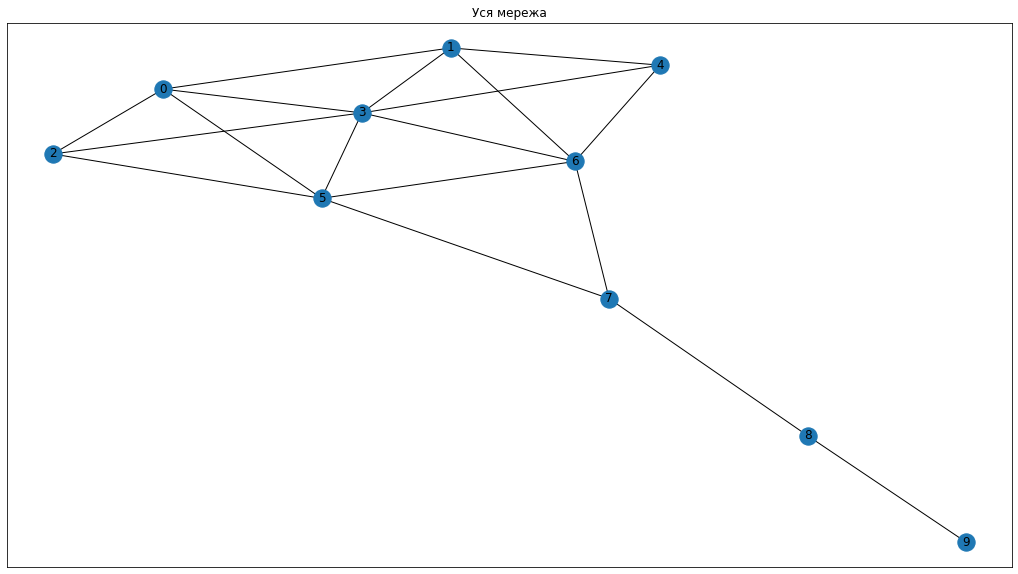

In [15]:
# повноцінна мережа
fig, ax = plt.subplots(1, 1, figsize=(18,10))
nx.draw_networkx(G, pos)
ax.set_title(f"Уся мережа")
plt.show()

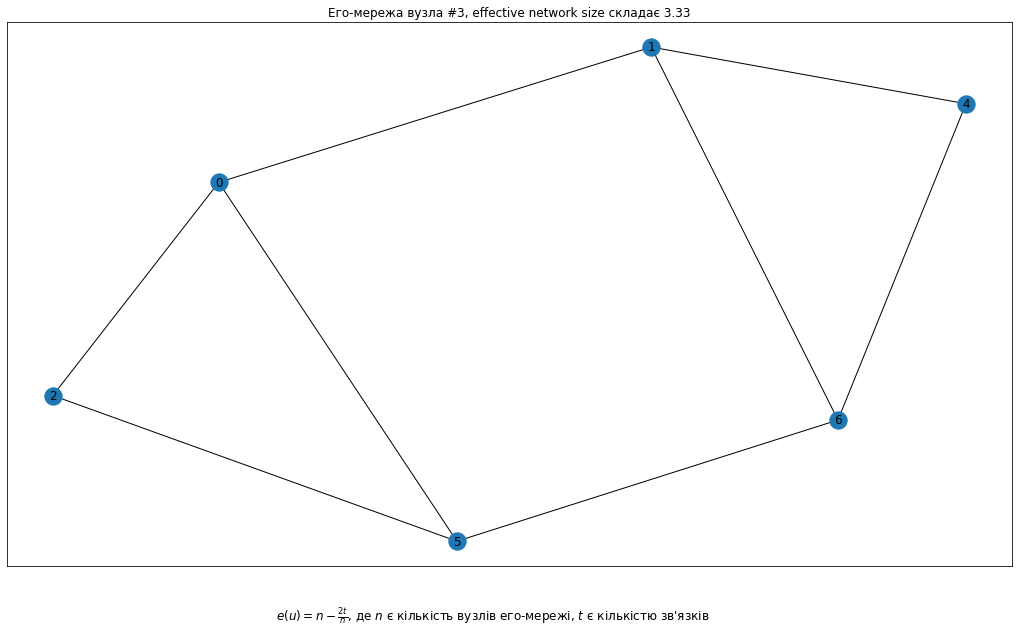

In [16]:
ego_graph_effective_size(G, 3)

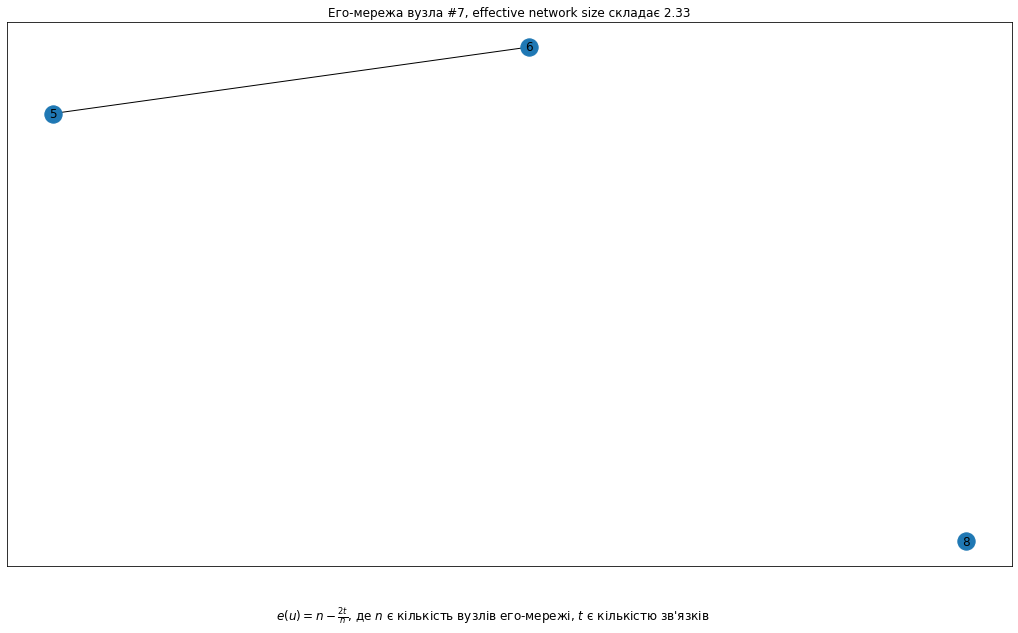

In [17]:
ego_graph_effective_size(G, 7)

In [18]:
# Як це працює
E = nx.ego_graph(G, 7, center=False, undirected=True)
number_of_nodes = len(E.nodes())
number_of_edges = len(E.edges())
print(f"{number_of_nodes=}, Nodes: {E.nodes()}")
print(f"{number_of_edges=}, Edges: {E.edges()}")
print("Формула: number_of_nodes - (2 * number_of_edges) / number_of_nodes")
print(f"Розрахунок: {number_of_nodes} - (2 * {number_of_edges}) / {number_of_nodes} = {number_of_nodes - (2 * number_of_edges) / number_of_nodes}")

number_of_nodes=3, Nodes: [8, 5, 6]
number_of_edges=1, Edges: [(5, 6)]
Формула: number_of_nodes - (2 * number_of_edges) / number_of_nodes
Розрахунок: 3 - (2 * 1) / 3 = 2.3333333333333335
